In [1]:
#here we fit the correlation functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import analysis_utils as simutils
import pandas as pd
import scipy.optimize as so

In [3]:
gparams=[0.0,5.0,0.6,0.0005]
llims=[gparams[0]-0.2,4.9999,gparams[2]/3.0,gparams[3]/3.0]
ulims=[gparams[0]+0.2,5.0001,gparams[2]*3.0,gparams[3]*3.0]

In [4]:
corrdf=pd.read_csv('correlations.csv')

In [5]:
fit=simutils.fcsfunc(corrdf.loc[1:,'tau'],*gparams)

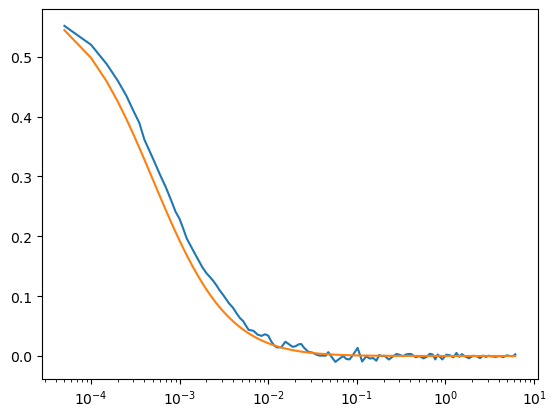

In [6]:
plt.plot(corrdf.loc[1:,'tau'],corrdf.loc[1:,'ch1'])
plt.plot(corrdf.loc[1:,'tau'],fit)
plt.xscale('log')

In [7]:
fparams,fcov=so.curve_fit(simutils.fcsfunc,corrdf.loc[1:,'tau'],corrdf.loc[1:,'ch1'],
             p0=gparams,bounds=(llims,ulims),method='trf')

#the standard error methods utilizes the square root of the diagonal of the covariance matrix
ferrs=np.sqrt(np.diag(fcov))
#now get the fit from the optimized parameters
fit=simutils.fcsfunc(corrdf.loc[1:,'tau'],*fparams)
#and get the chi squared value
rchi2=((corrdf.loc[1:,'tau']-fit)**2).sum()/(len(corrdf.loc[1:,'tau'])-len(gparams))

In [8]:
print(fparams)
print(ferrs)

[-5.93142611e-04  5.00010000e+00  6.00426098e-01  6.51356715e-04]
[5.97808961e-04 7.25272808e-01 3.86251885e-03 1.58769286e-05]


Text(0, 0.5, 'G(tau)')

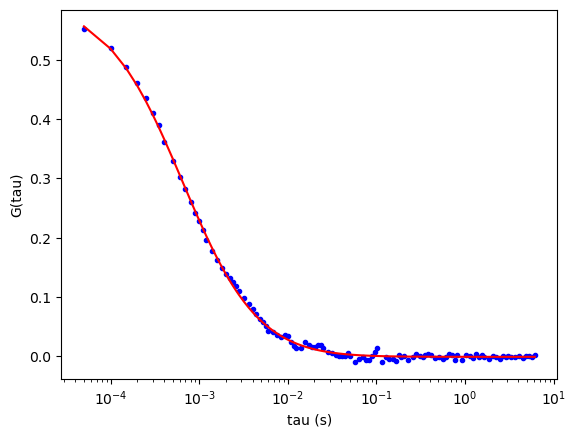

In [9]:
plt.plot(corrdf.loc[1:,'tau'],corrdf.loc[1:,'ch1'],'b.')
plt.plot(corrdf.loc[1:,'tau'],fit,'r-')
plt.xscale('log')
plt.xlabel('tau (s)')
plt.ylabel('G(tau)')